#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data

In [9]:
data = pd.read_csv("data/titanic.csv")
data.Pclass = data.Pclass.transform(lambda x: "First" if x == 1 else "Second" if x == 2 else "Third")
data.Survived = data.Survived.transform(lambda x: "Yes" if x else 'No')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,No,Third,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,Yes,Third,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,No,Second,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Pie chart

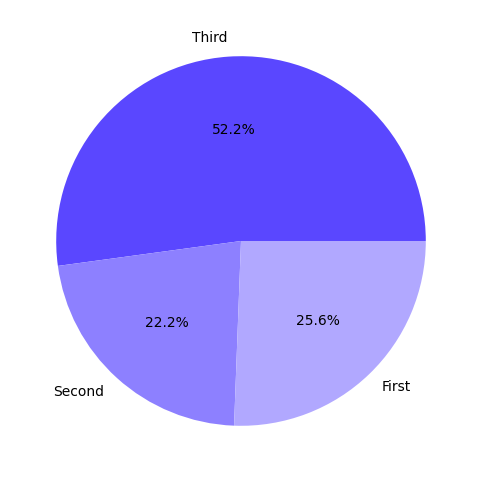

In [7]:
plt.figure(figsize=(6, 6))
plt.pie(
    [len(data[data.Pclass == pc]) for pc in data.Pclass.unique()],
    labels = data.Pclass.unique(),
    autopct = '%1.1f%%',
    colors = ['#5a47ff', '#8d80ff', '#b1a8ff']
)
plt.show()

# Bar plot

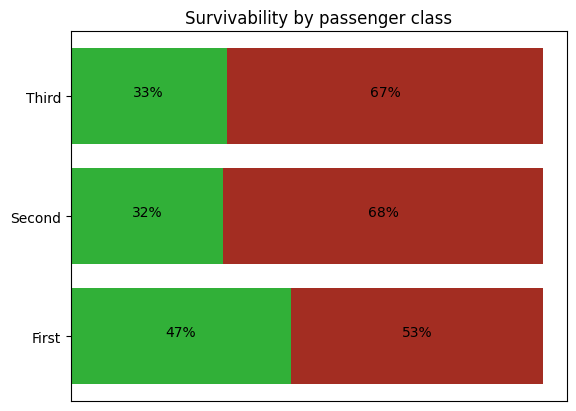

In [53]:
survived = pd.concat([data['Pclass'], pd.get_dummies(data['Survived'])], axis=1)
survived = survived.groupby('Pclass').sum()
def calculatePercentage(row):
    peopleCount = row.Yes + row.No
    row.Yes = row.Yes / peopleCount
    row.No = row.No / peopleCount
    return row
survived = survived.transform(calculatePercentage)

plt.barh(survived.index, survived.Yes, color='#31b038')
plt.barh(survived.index, survived.No, left=survived.Yes, color='#a32d22')
plt.xticks([])
for pc in survived.index:
    yesPos = survived.loc[pc].Yes / 2
    noPos = survived.loc[pc].Yes + survived.loc[pc].No / 2
    plt.text(yesPos, pc, f"{round(survived.loc[pc].Yes*100)}%", horizontalalignment='center')
    plt.text(noPos, pc, f"{round(survived.loc[pc].No*100)}%", horizontalalignment='center')
plt.title('Survivability by passenger class')
plt.show()

# Sequence of stacked bar plots

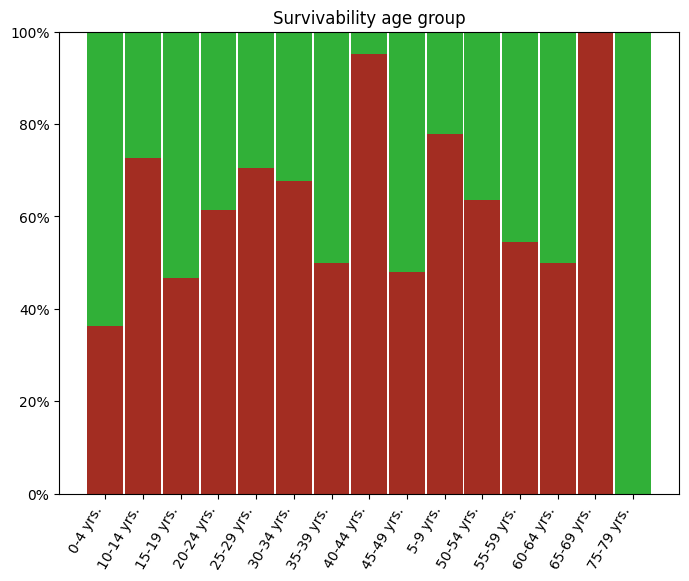

In [87]:
subset = data[data.Age.notnull()]
subset = pd.concat([subset.Age, pd.get_dummies(subset.Survived)], axis=1)
subset.Age = subset.Age.transform(lambda age: f"{int(age//5*5)}-{int(age//5*5+4)} yrs.")
subset = subset.groupby('Age').sum()
subset = subset.transform(calculatePercentage)

plt.figure(figsize=(8, 6))
for i, age in enumerate(subset.index):
    plt.bar(i, subset.loc[age].No, color='#a32d22', width=0.95)
    plt.bar(i, subset.loc[age].Yes, bottom=subset.loc[age].No, color='#31b038', width=0.95)
plt.xticks(np.arange(len(subset)), subset.index, rotation=60, ha='right')
plt.yticks(np.arange(0, 1.1, 0.2), [f"{int(per*100)}%" for per in np.arange(0, 1.1, 0.2)])
plt.title('Survivability age group')
plt.show()

# Stacked density plots

#### Data

Source <a href='https://www.kaggle.com/datasets/sriharshaeedala/electricity-generated-in-us-by-sector'>here</a>.

In [92]:
data = pd.read_csv('Data/US_energy_sector.csv')
data.columns = ['Month', 'All', 'Coal', 'Natural gas', 'Nuclear', 'Hydroelectric', 'Wind', 'Solar']
data.head(3)

,Month,All,Coal,Natural gas,Nuclear,Hydroelectric,Wind,Solar
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725


In [105]:
import datetime

def dateConverter(date):
    monthConverter = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                      'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

data.Month.transform(dateConverter)

ValueError: Transform function failed

# Tree plot

# Parallel sets plot